## Library Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from binance.client import Client
from datetime import datetime 

## Binance API Setup

In [ ]:
# Define Binance API keys
api_key = "zvbkdnp5VMDAdtX4WMNtmxQC4wbVukTcTpX3PRrs1UYIz9T2zW5j5uNAJagdCq04"    # Binance API key
secret_key = "KcoIju1CD9ULVV5e2KlIgfPsQNGkYcEM1r0DMcv5bic9EC8e7zURdeeR5UOUJ5ZZ"  # Binance API secret key

# Initialise Binance client
client = Client(api_key, secret_key)

# Fetch candlestick data from Binance
symbol = 'BTCUSDT'  # Symbol for BTC against USDT
interval = Client.KLINE_INTERVAL_15MINUTE  # Interval for candlestick data
limit = 1000  # Number of data points to fetch
dataset = client.get_klines(symbol=symbol, interval=interval, limit=limit)  # Fetch candlestick data

These lines of code set the correct setting to retrieve Bitcoin candlestick data against USDT via the Binance API. It imports critical libraries for data manipulation, analysis, visualisation and machine learning model development, sets up the Binance client with API credentials and retrieves the necessary data.

## Data Processing 

In [18]:
# Extract closing prices and timestamps from candlestick data
closing_prices = np.array([float(data[4]) for data in dataset])  # closing prices for 1000 candles
timestamps = np.array([int(data[0]) for data in dataset])  # Timestamps for 1000 candles
time_strings = np.array([datetime.fromtimestamp(timestamp / 1000).strftime('%Y-%m-%d %H:%M:%S') for timestamp in timestamps])  # Convert timestamps to readable form for 1000 candles

# Create a DataFrame for the candlestick chart
df = pd.DataFrame({'Date': time_strings, 'Close': closing_prices})  # Create df with timestamps and closing prices
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' as index

The closing prices and timestamps are collected from the Binance API's candlestick dataset. The timestamps are then turned into date-time strings that humans can understand. The extracted data is then stored in a pandas DataFrame, which includes columns for the date and closing price. After that, the date column is transformed to datetime format and used as the DataFrame's index.

## Visualisation

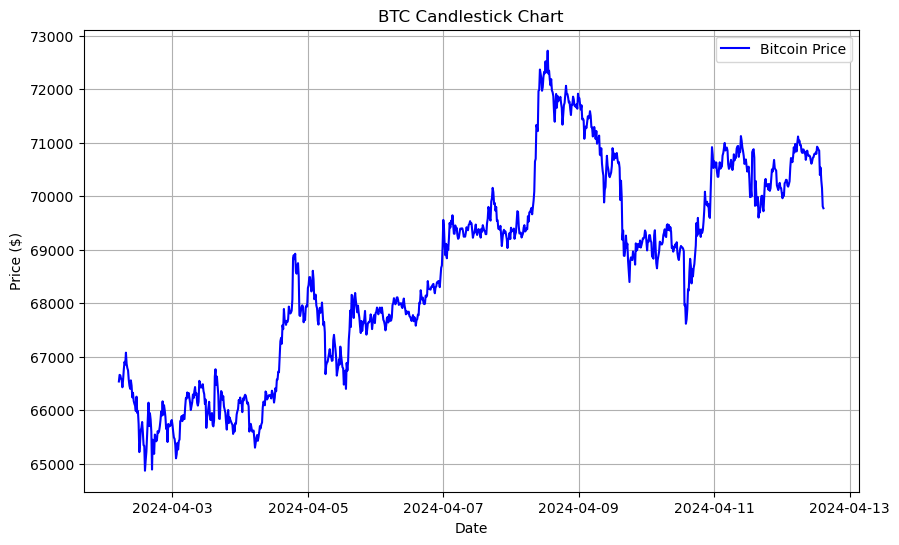

In [19]:
# Plotting the chart
plt.figure(figsize=(10, 6))  
plt.plot(df.index, df['Close'], label='Bitcoin Price', color='blue')  # Closing prices
plt.title('BTC Candlestick Chart')  
plt.xlabel('Date')  
plt.ylabel('Price ($)')  
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

## Data Preprocessing

In [20]:
# Creating a DataFrame for minute-by-minute price data
price_data = pd.DataFrame({'Time': time_strings, 'Price_BTC': closing_prices})

In [29]:
# Reshape the price array to a column vector
price = closing_prices.reshape(-1, 1) 

scaler = StandardScaler()  # StandardScaler object for standardising the price 

# Fit the scaler on the first 800 candles for training
scaler.fit(price[:800])  

price_standardised = scaler.transform(price)  # Standardising the price using the fitted scaler

# Reshape the standardised price to have 200 rows and 5 columns
price_reshaped = price_standardised.reshape(200, 5)  

# DataFrame with input and target columns for model training
new_columns = ['Scaled_Price_1', 'Scaled_Price_2', 'Scaled_Price_3', 'Scaled_Price_4', 'Target_Price']
df = pd.DataFrame(price_reshaped, columns=new_columns)  

# Printing the DataFrame to visualise the data structure
print(df)  

     Scaled_Price_1  Scaled_Price_2  Scaled_Price_3  Scaled_Price_4  \
0         -0.904175       -0.838322       -0.842887       -0.874414   
1         -0.961648       -0.885523       -0.782605       -0.708469   
2         -0.617425       -0.728169       -0.770879       -0.793591   
3         -0.947076       -0.976598       -0.892992       -0.944698   
4         -1.016515       -1.097902       -1.125572       -1.146453   
..              ...             ...             ...             ...   
195        1.345106        1.391886        1.355746        1.340014   
196        1.334833        1.295011        1.262106        1.285515   
197        1.327384        1.357869        1.357017        1.372909   
198        1.431079        1.419588        1.402861        1.392295   
199        1.222865        1.095959        1.017370        0.836512   

     Target_Price  
0       -0.892683  
1       -0.735415  
2       -0.887129  
3       -1.061714  
4       -1.197920  
..            ...  
195    

The price data preparation for model training is the main objective of the code block above. The price array must be reshaped into a column vector, the data must be standardised using StandardScaler then the standardised price array must be reshaped into a structured DataFrame for further analysis. It also outputs the DataFrame so that the structure and scaled pricing data can be seen.

## Data Splitting 

In [22]:
# Split train and test data
train_samples = 150
test_samples = 50

# Naive Prediction: Using the last observed value as the prediction
y_test = df.iloc[train_samples:train_samples + test_samples, -1].values
y_pred_naive = df.iloc[train_samples-1:train_samples + test_samples-1, -2].values

## Evaluation Metrics for Naive Model

In [23]:
# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_naive))
test_r2 = r2_score(y_test, y_pred_naive)

# Print the evaluation metrics
print('Test Score (RMSE): {:.2f}'.format(test_rmse))
print('R-squared: {:.2f}%'.format(test_r2 * 100))

Test Score (RMSE): 0.24
R-squared: 68.66%


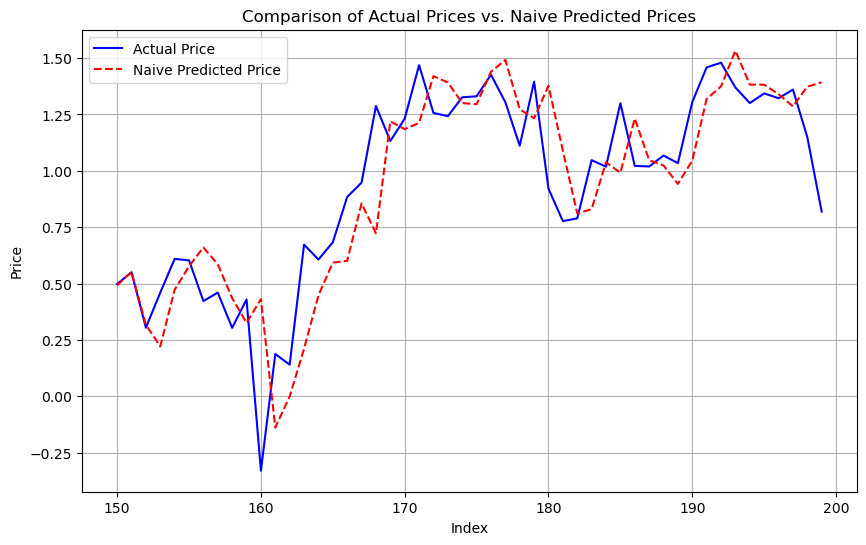

In [24]:
# Visulisation of actual vs predicted 
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_samples:train_samples + test_samples], y_test, label='Actual Price', color='blue')
plt.plot(df.index[train_samples:train_samples + test_samples], y_pred_naive, label='Naive Predicted Price', color='red', linestyle='--')
plt.title('Comparison of Actual Prices vs. Naive Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Model Description:
A basic baseline prediction model for determining bitcoin values will be used with the given code. It is a simple rule-based approach in which the most recent observed value in the time series is used to make each forecast.

### Why Saving and Loading Doesn't Make Sense:
Because it doesn't use data-driven learning, the model is simple and has no parameters or weights to save and load. The model uses a set of rules to make predictions without experiencing any training or learning. In addition, it has no need to store or load any state because the model is not responsive or becomes better over time. Preprocessing is necessary for standardisation, but it's a simple procedure that doesn't need loading and storing.

For these reasons, loading and saving the model has no real use because it doesn't require any learning or adjustment.


# Evalution

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
# Calculate additional evaluation metrics for Naive Baseline Model
mae_naive = mean_absolute_error(y_test, y_pred_naive)
mape_naive = mean_absolute_percentage_error(y_test, y_pred_naive)
explained_variance_naive = explained_variance_score(y_test, y_pred_naive)

# Print additional evaluation metrics for Naive Baseline Model
print('\nAdditional Evaluation Metrics for Naive Baseline Model:')
print('Naive Baseline Mean Absolute Error (MAE): {:.2f}'.format(mae_naive))
print('Naive Baseline Mean Absolute Percentage Error (MAPE): {:.2f}%'.format(mape_naive * 100))
print('Naive Baseline Explained Variance Score: {:.2f}'.format(explained_variance_naive))


Additional Evaluation Metrics for Naive Baseline Model:
Naive Baseline Mean Absolute Error (MAE): 0.17
Naive Baseline Mean Absolute Percentage Error (MAPE): 27.25%
Naive Baseline Explained Variance Score: 0.69


C:\Users\kanso\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


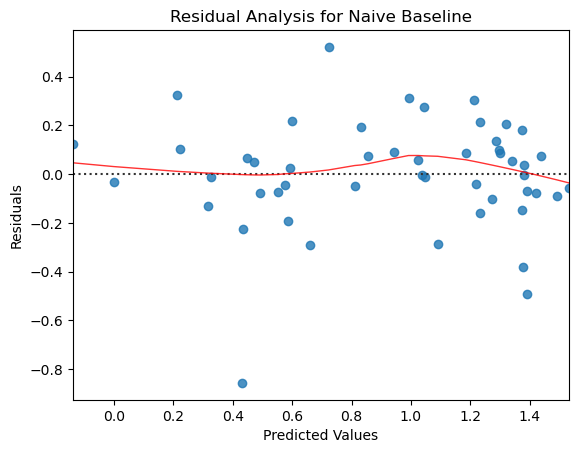

In [26]:
import seaborn as sns
# Residual Analysis for Naive Baseline
residuals_naive = y_test - y_pred_naive
sns.residplot(y_pred_naive, residuals_naive, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Naive Baseline')
plt.show()


For a Naive Baseline Model, this method determines additional evaluation metrics such as Explained Variance Score, Mean Absolute Error (MAPE) and Mean Absolute Error (MAE). Following that, it does the Naive Baseline Model's residual analysis.

## References

- Harris, Charles, et al. (2020). *Array programming with NumPy*. Nature, 585(7825), 357-362. [https://doi.org/10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2)
- Hunter, John D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90-95. [https://doi.org/10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55)
- McKinney, Wes. (2010). *Data Structures for Statistical Computing in Python*, Proceedings of the 9th Python in Science Conference, 51-56. [https://conference.scipy.org/proceedings/scipy2010/mckinney.html](https://conference.scipy.org/proceedings/scipy2010/mckinney.html)
- Binance API documentation. [https://binance-docs.github.io/apidocs/spot/en/](https://binance-docs.github.io/apidocs/spot/en/)
- Pedregosa, F., et al. (2011). *Scikit-learn: Machine Learning in Python*, Journal of Machine Learning Research, 12, 2825-2830. [http://jmlr.org/papers/v12/pedregosa11a.html](http://jmlr.org/papers/v12/pedregosa11a.html)
- Hyndman, R.J., & Athanasopoulos, G. (2018). *Forecasting: Principles and Practice*. 2nd ed. Monash University, Australia. [https://otexts.com/fpp2/](https://otexts.com/fpp2/)
- Makridakis, Spyros, et al. (2020). *M4 Forecasting Competition: Results, findings, conclusion and way forward*. International Journal of Forecasting, 36(1), 3-18. [https://doi.org/10.1016/j.ijforecast.2019.04.014](https://doi.org/10.1016/j.ijforecast.2019.04.014)

